# Continuous Control

---

### 1. Start the Environment

We begin by importing the necessary packages.

In [1]:
from ddpg_agent import Agent
import random, torch, time
import numpy as np
from collections import deque
import matplotlib.pyplot as plt
from unityagents import UnityEnvironment
from model import Actor, Critic
from torch.autograd import Variable
from torchviz import make_dot

%matplotlib inline

Next, we will start the environment! 

- **Linux** (x86_64): `"path/to/Crawler_Linux/Crawler.x86_64"`

In [2]:
env = UnityEnvironment(file_name='/home/psardar/DRLND/deep-reinforcement-learning/p2_continuous-control/Reacher_Linux_20/Reacher.x86_64')

INFO:unityagents:
'Academy' started successfully!
Unity Academy name: Academy
        Number of Brains: 1
        Number of External Brains : 1
        Lesson number : 0
        Reset Parameters :
		goal_speed -> 1.0
		goal_size -> 5.0
Unity brain name: ReacherBrain
        Number of Visual Observations (per agent): 0
        Vector Observation space type: continuous
        Vector Observation space size (per agent): 33
        Number of stacked Vector Observation: 1
        Vector Action space type: continuous
        Vector Action space size (per agent): 4
        Vector Action descriptions: , , , 


Environments contain **_brains_** which are responsible for deciding the actions of their associated agents. Here we check for the first brain available, and set it as the default brain we will be controlling from Python.

In [3]:
# get the default brain
brain_name = env.brain_names[0]
brain = env.brains[brain_name]

# reset the environment
env_info = env.reset(train_mode=True)[brain_name]

# number of agents
num_agents = len(env_info.agents)
print('Number of agents:', num_agents)

# size of each action
action_size = brain.vector_action_space_size
print('Size of each action:', action_size)

# examine the state space 
states = env_info.vector_observations
state_size = states.shape[1]
print('There are {} agents. Each observes a state with length: {}'.format(states.shape[0], state_size))
print('The state for the first agent looks like:\n', states[0])

Number of agents: 20
Size of each action: 4
There are 20 agents. Each observes a state with length: 33
The state for the first agent looks like:
 [ 0.00000000e+00 -4.00000000e+00  0.00000000e+00  1.00000000e+00
 -0.00000000e+00 -0.00000000e+00 -4.37113883e-08  0.00000000e+00
  0.00000000e+00  0.00000000e+00  0.00000000e+00  0.00000000e+00
  0.00000000e+00  0.00000000e+00 -1.00000000e+01  0.00000000e+00
  1.00000000e+00 -0.00000000e+00 -0.00000000e+00 -4.37113883e-08
  0.00000000e+00  0.00000000e+00  0.00000000e+00  0.00000000e+00
  0.00000000e+00  0.00000000e+00  5.75471878e+00 -1.00000000e+00
  5.55726624e+00  0.00000000e+00  1.00000000e+00  0.00000000e+00
 -1.68164849e-01]


In [4]:
agent = Agent(state_size=state_size, action_size=action_size, random_seed=0)

In [7]:
def ddpg(n_episodes=1000, max_t=1000):
        
    scores_window = deque(maxlen=100)
    scores = []
    total_time_elapsed = 0
    for i_episode in range(1, n_episodes+1):
        begin = time.time()
        avg_score = 0
        env_info = env.reset(train_mode=True)[brain_name]      # reset the environment    
        states = env_info.vector_observations                  # get the current state (for each agent)
        scores_t = np.zeros(num_agents)                        # initialize the score (for each agent)
        agent.reset()
        score = 0
        for t_step in range(max_t):
            actions = agent.act(states)     
            env_info = env.step(actions)[brain_name]           # send all actions to tne environment
            next_states = env_info.vector_observations         # get next state (for each agent)
            rewards = env_info.rewards                         # get reward (for each agent)
            dones = env_info.local_done                        # see if episode finished   
            agent.step(states, actions, rewards, next_states, dones, t_step)
            states = next_states
            scores_t += rewards
            if np.any(dones):
                break
        
        score = np.mean(scores_t)
        scores_window.append(score)
        avg_score = np.mean(scores_window)
        scores.append(score)        
        
        end = time.time()
        diff = end - begin
        print("\rEpisode {:}\t Average Score {:.2f}\tMax Score {:.2f}\tTime {:.2f} s".format(i_episode, avg_score, scores_t.max(), diff), end="")
        total_time_elapsed += diff
        
        if i_episode % 100 == 0:
            print("\rEpisode {:}\t Average Score {:.2f}\tMax Score {:.2f}".format(i_episode, avg_score, scores_t.max()))

        if avg_score >= 30:
            print('\nEnvironment solved in {:d} episodes!\tAverage Score: {:.2f}\t\tTime Elapsed {:.2f} s'.format(i_episode, avg_score,total_time_elapsed))
            torch.save(agent.actor_local.state_dict(), 'checkpoint_actor.pth')
            torch.save(agent.critic_local.state_dict(), 'checkpoint_critic.pth')            
            break
    return scores

/home/psardar/anaconda3/envs/drlnd/lib/python3.6/site-packages/torch/nn/functional.py:995: UserWarning: nn.functional.tanh is deprecated. Use torch.tanh instead.
  warnings.warn("nn.functional.tanh is deprecated. Use torch.tanh instead.")


Episode 100	 Average Score 4.53	Max Score 13.25	Time 37.99 s
Episode 200	 Average Score 18.00	Max Score 36.55	Time 38.15 s
Episode 282	 Average Score 30.01	Max Score 37.52	Time 37.84 s
Environment solved in 282 episodes!	Average Score: 30.01		Time Elapsed 9976.36 s


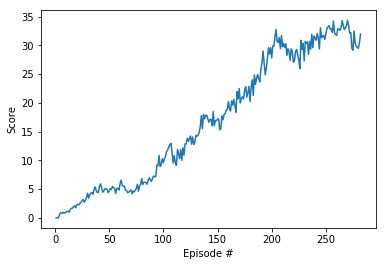

In [8]:
scores = ddpg()

fig = plt.figure()
ax = fig.add_subplot(111)
plt.plot(np.arange(1, len(scores)+1), scores)
plt.ylabel('Score')
plt.xlabel('Episode #')
plt.show()

/home/psardar/anaconda3/envs/drlnd/lib/python3.6/site-packages/torch/nn/functional.py:995: UserWarning: nn.functional.tanh is deprecated. Use torch.tanh instead.
  warnings.warn("nn.functional.tanh is deprecated. Use torch.tanh instead.")


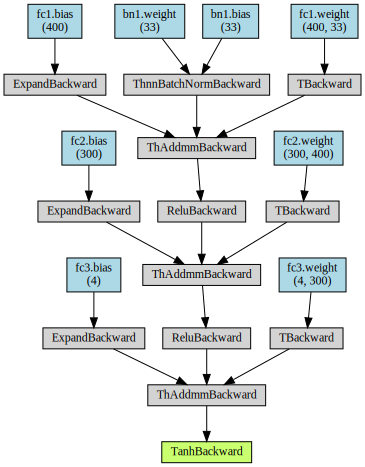

In [9]:
model = Actor(33, 4, 0)

x = Variable(torch.randn(33)).unsqueeze(0)
model.eval()
y = model(x)
             
make_dot(y, params=dict(list(model.named_parameters())))

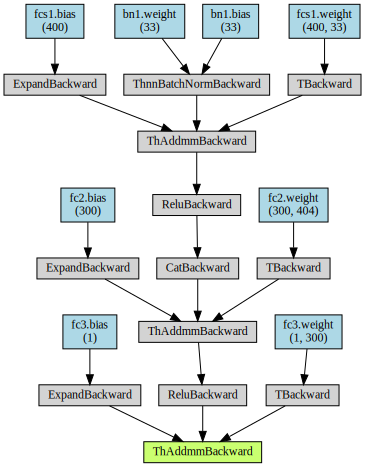

In [10]:
model = Critic(33, 4, 0)

x = Variable(torch.randn(33)).unsqueeze(0)
action = Variable(torch.randn(4)).unsqueeze(0)
model.eval()
y = model(x, action)
             
make_dot(y, params=dict(list(model.named_parameters())))